<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Question-2" data-toc-modified-id="Question-2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Question 2</a></span><ul class="toc-item"><li><span><a href="#Part-1" data-toc-modified-id="Part-1-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Part 1</a></span></li><li><span><a href="#Part-2" data-toc-modified-id="Part-2-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Part 2</a></span></li><li><span><a href="#Part-3" data-toc-modified-id="Part-3-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Part 3</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings

In [2]:
warnings.filterwarnings('ignore')
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

## Question 2

1. First, load the dataset from the weatherinszeged table from Thinkful's database.
2. Build a linear regression model where your target variable is the difference between the apparenttemperature and the temperature. As explanatory variables, use humidity and windspeed. Now, estimate your model using OLS. Are the estimated coefficients statistically significant? Are the signs of the estimated coefficients in line with your previous expectations? Interpret the estimated coefficients. What are the relations between the target and the explanatory variables?
3. Next, include the interaction of humidity and windspeed to the model above and estimate the model using OLS. Are the coefficients statistically significant? Did the signs of the estimated coefficients for humidity and windspeed change? Interpret the estimated coefficients.

### Part 1

In [3]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
raw = pd.read_sql_query('select * from weatherinszeged',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [4]:
raw.shape

(96453, 12)

### Part 2

In [5]:
data = raw[['humidity', 'windspeed']]
data['target'] = raw['apparenttemperature'] - raw['temperature']
data.head()

,humidity,windspeed,target
0,0.89,14.1197,-2.083333
1,0.86,14.2646,-2.127778
2,0.89,3.9284,0.000000
3,0.83,14.1036,-2.344444
4,0.83,11.0446,-1.777778


In [6]:
X = data[['humidity', 'windspeed']]
Y = data['target']

X = sm.add_constant(X)
X.head()

,const,humidity,windspeed
0,1.0,0.89,14.1197
1,1.0,0.86,14.2646
2,1.0,0.89,3.9284
3,1.0,0.83,14.1036
4,1.0,0.83,11.0446


In [15]:
model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                 1.949e+04
Date:                Thu, 09 Jan 2020   Prob (F-statistic):               0.00
Time:                        14:35:56   Log-Likelihood:            -1.7046e+05
No. Observations:               96453   AIC:                         3.409e+05
Df Residuals:                   96450   BIC:                         3.409e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4381      0.021    115.948      0.000       2.397       2.479
humidity      -3.0292      0.024   -126.479      0.000      -3.076      -2.982
windspeed     -0.1193      0.001   -176.164      0.000      -0.121      -0.118
==============================================================================
Omnibus:                     3935.747   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4613.311
Skew:                          -0.478   Prob(JB):                         0.00
Kurtosis:                       3.484   Cond. No.                         88.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*Answer*

All the coefficients are statistically significant, and the β₁ and β₂ are understandably negative as the target variable is negative. We can plot the relationship between the variables as below:

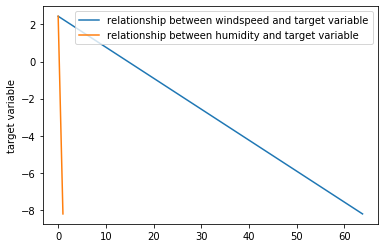

In [16]:
sample_windspeed = np.linspace(min(data['windspeed']), max(data['windspeed']), 100)
sample_humidity = np.linspace(min(data['humidity']), max(data['humidity']), 100)

sample_target1 = model.params['const'] + model.params['humidity'] * \
    sample_humidity + model.params['windspeed'] * sample_windspeed

plt.plot(sample_windspeed, sample_target1, label = 'relationship between windspeed and target variable')
plt.plot(sample_humidity, sample_target1, label = 'relationship between humidity and target variable')
plt.ylabel('target variable')
plt.legend()

As expected, the relationship is linear. 

### Part 3

In [12]:
data['interaction'] = data['humidity'] * data['windspeed']
X2 = data[['humidity', 'windspeed', 'interaction']]
X2 = sm.add_constant(X2)
X2.head()

,const,humidity,windspeed,interaction
0,1.0,0.89,14.1197,12.566533
1,1.0,0.86,14.2646,12.267556
2,1.0,0.89,3.9284,3.496276
3,1.0,0.83,14.1036,11.705988
4,1.0,0.83,11.0446,9.167018


In [17]:
model2 = sm.OLS(Y, X2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                 1.666e+04
Date:                Thu, 09 Jan 2020   Prob (F-statistic):               0.00
Time:                        14:36:00   Log-Likelihood:            -1.6669e+05
No. Observations:               96453   AIC:                         3.334e+05
Df Residuals:                   96449   BIC:                         3.334e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0839      0.033      2.511      0.012       0.018       0.149
humidity        0.1775      0.043      4.133      0.000       0.093       0.262
windspeed       0.0905      0.002     36.797      0.000       0.086       0.095
interaction    -0.2971      0.003    -88.470      0.000      -0.304      -0.291
==============================================================================
Omnibus:                     4849.937   Durbin-Watson:                   0.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9295.404
Skew:                          -0.378   Prob(JB):                         0.00
Kurtosis:                       4.320   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Answer__

While the coefficients continue to remain statistically significant, we now get a model with a higher R^2 value. Moreoever, the signs for β₁ and β₂ are positive, whereas only β₃ is negative. 

β₁ = 0.178 and β₂ = 0.09 signify that a 1 point increase in humidity and windspeed coincide with 0.178 and 0.09 point increases in the target variable, ceteris paribus.  

β₃ = (-0.3) signifies that the for a specific level of humidity, the target variable increases by 0.178 - 0.3 * windspeed for a 1 point increase in windspeed, or, for a specific level of windspeed, the target variable increased by 0.09 - 0.3 * humidity for a 1 point increase in humidity.

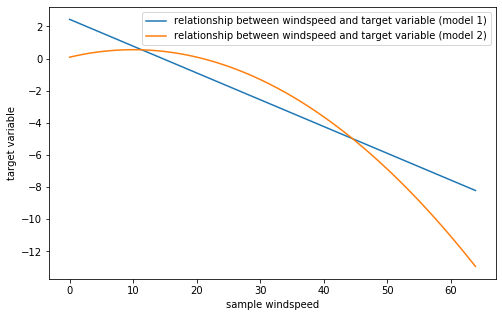

In [24]:
sample_interaction = sample_humidity * sample_windspeed

sample_target2 = model2.params['const'] + model2.params['humidity'] * \
    sample_humidity + model2.params['windspeed'] * sample_windspeed + \
    model2.params['interaction'] * sample_interaction


plt.figure(figsize=(8, 5))
plt.plot(sample_windspeed, sample_target1, label = 'relationship between windspeed and target variable (model 1)')
plt.plot(sample_windspeed, sample_target2, label = 'relationship between windspeed and target variable (model 2)')
plt.ylabel('target variable')
plt.xlabel('sample windspeed')
plt.legend()

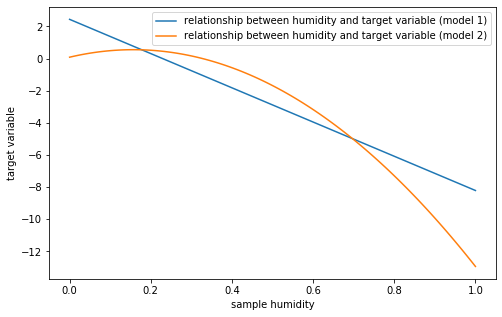

In [25]:
plt.figure(figsize=(8, 5))
plt.plot(sample_humidity, sample_target1, label = 'relationship between humidity and target variable (model 1)')
plt.plot(sample_humidity, sample_target2, label = 'relationship between humidity and target variable (model 2)')
plt.ylabel('target variable')
plt.xlabel('sample humidity')
plt.legend()